In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flights=pd.read_csv('flights.csv')
flights=flights.sample(n=100000)
flights.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9380\664831390.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights=pd.read_csv('flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3004260,2015,7,8,3,DL,1578,N3752,SEA,LAX,654,...,944.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3384564,2015,7,30,4,AA,351,N581AA,DFW,IAH,1359,...,1459.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2138682,2015,5,16,6,MQ,3466,N504MQ,RDU,LGA,1250,...,1412.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
324302,2015,1,22,4,EV,5014,N605QX,ELM,DTW,930,...,1108.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2753749,2015,6,22,1,EV,5215,N722EV,LGA,GRR,2050,...,5.0,63.0,0,0,NaN,3.0,0.0,9.0,51.0,0.0


In [3]:
flights.shape

(100000, 31)

In [4]:
flights.isnull().values.any()

True

In [5]:
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              268
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1540
DEPARTURE_DELAY         1540
TAXI_OUT                1600
WHEELS_OFF              1600
SCHEDULED_TIME             0
ELAPSED_TIME            1891
AIR_TIME                1891
DISTANCE                   0
WHEELS_ON               1652
TAXI_IN                 1652
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1652
ARRIVAL_DELAY           1891
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98388
AIR_SYSTEM_DELAY       81711
SECURITY_DELAY         81711
AIRLINE_DELAY          81711
LATE_AIRCRAFT_DELAY    81711
WEATHER_DELAY          81711
dtype: int64

<Axes: xlabel='CANCELLATION_REASON', ylabel='count'>

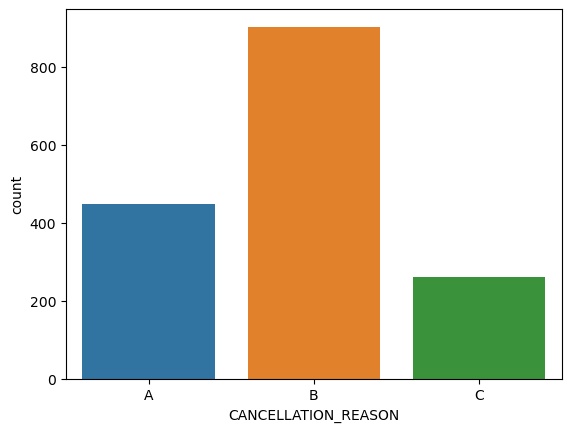

In [6]:
sns.countplot(x='CANCELLATION_REASON',data=flights)

<Axes: xlabel='MONTH', ylabel='count'>

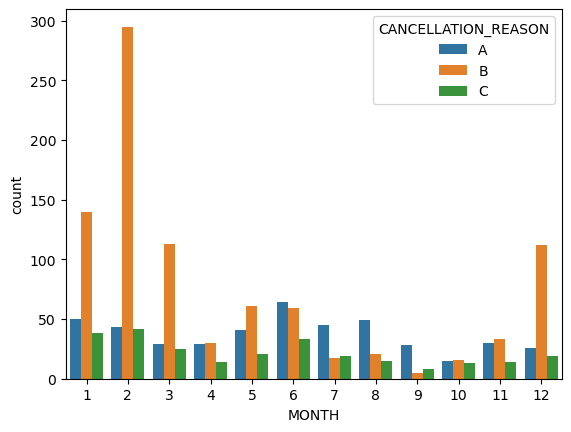

In [7]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

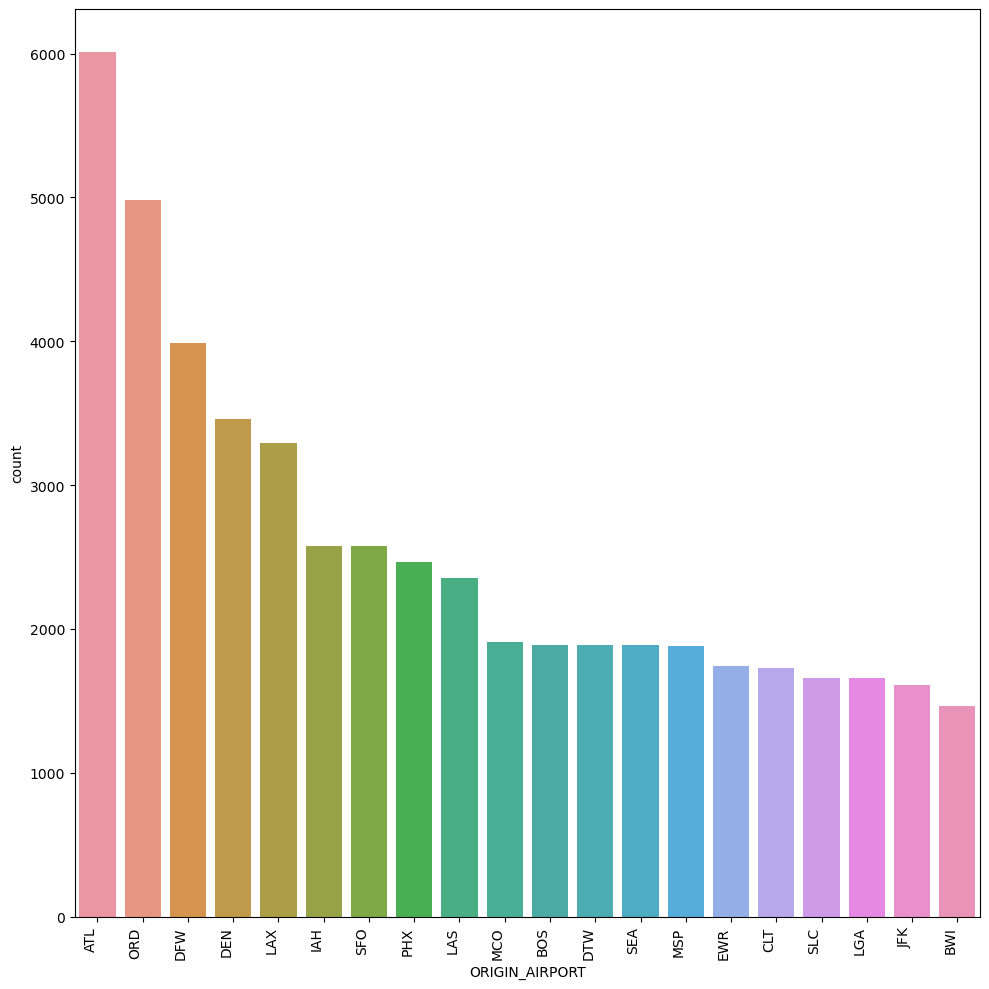

In [8]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

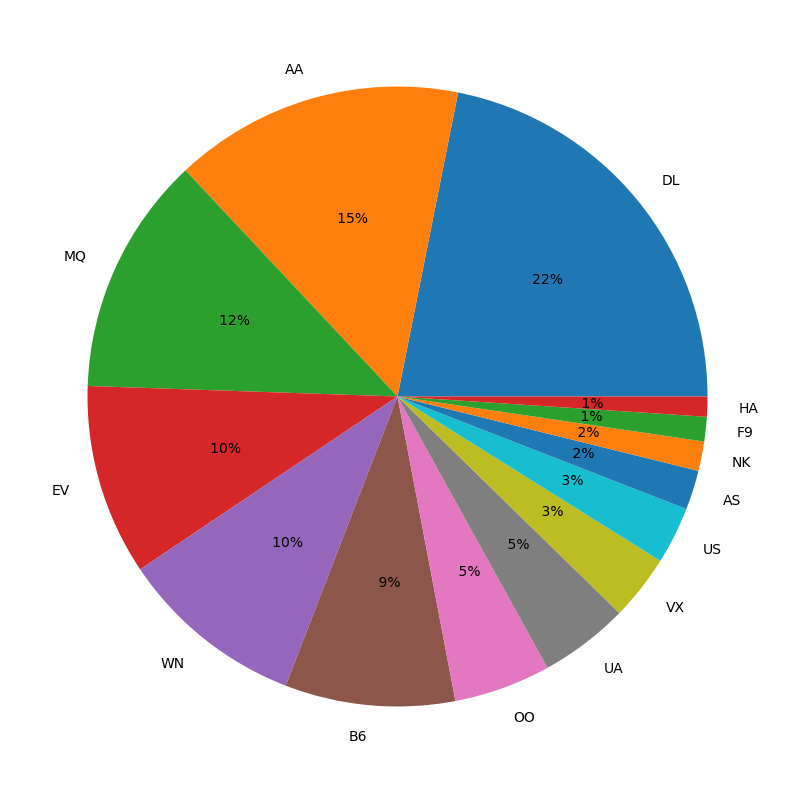

In [9]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [11]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [12]:
airport = pd.read_csv('airports.csv')
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [13]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
3004260,7,8,3,DL,SEA,LAX,654,0.0,954,-1.0
3384564,7,30,4,AA,DFW,IAH,1359,0.0,224,-14.0
2138682,5,16,6,MQ,RDU,LGA,1250,-3.0,431,-15.0
324302,1,22,4,EV,ELM,DTW,930,-3.0,332,12.0
2753749,6,22,1,EV,LGA,GRR,2050,60.0,618,63.0
...,...,...,...,...,...,...,...,...,...,...
3983099,9,4,5,UA,IAD,MCO,1745,129.0,758,117.0
5156915,11,18,3,DL,DTW,BOS,2151,10.0,632,-1.0
2674040,6,18,4,WN,LAS,MSY,750,0.0,1500,-8.0
5661949,12,21,1,EV,ORF,ORD,1705,12.0,717,38.0


In [14]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())
  

flights=flights.dropna()
flights

320
320
14


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
3004260,7,8,3,DL,SEA,LAX,654,0.0,954,-1.0
3384564,7,30,4,AA,DFW,IAH,1359,0.0,224,-14.0
2138682,5,16,6,MQ,RDU,LGA,1250,-3.0,431,-15.0
324302,1,22,4,EV,ELM,DTW,930,-3.0,332,12.0
2753749,6,22,1,EV,LGA,GRR,2050,60.0,618,63.0
...,...,...,...,...,...,...,...,...,...,...
3983099,9,4,5,UA,IAD,MCO,1745,129.0,758,117.0
5156915,11,18,3,DL,DTW,BOS,2151,10.0,632,-1.0
2674040,6,18,4,WN,LAS,MSY,750,0.0,1500,-8.0
5661949,12,21,1,EV,ORF,ORD,1705,12.0,717,38.0


In [15]:
flights.shape

(98109, 10)

In [16]:
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
3004260,7,8,3,DL,SEA,LAX,654,0.0,954,-1.0
3384564,7,30,4,AA,DFW,IAH,1359,0.0,224,-14.0
2138682,5,16,6,MQ,RDU,LGA,1250,-3.0,431,-15.0
324302,1,22,4,EV,ELM,DTW,930,-3.0,332,12.0
2753749,6,22,1,EV,LGA,GRR,2050,60.0,618,63.0
...,...,...,...,...,...,...,...,...,...,...
3983099,9,4,5,UA,IAD,MCO,1745,129.0,758,117.0
5156915,11,18,3,DL,DTW,BOS,2151,10.0,632,-1.0
2674040,6,18,4,WN,LAS,MSY,750,0.0,1500,-8.0
5661949,12,21,1,EV,ORF,ORD,1705,12.0,717,38.0


In [17]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
3004260,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3384564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2138682,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
324302,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2753749,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983099,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
5156915,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2674040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5661949,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [18]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=657)

In [19]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
3004260,7,8,654,0.0,954,-1.0
3384564,7,30,1359,0.0,224,-14.0
2138682,5,16,1250,-3.0,431,-15.0
324302,1,22,930,-3.0,332,12.0
2753749,6,22,2050,60.0,618,63.0
...,...,...,...,...,...,...
3983099,9,4,1745,129.0,758,117.0
5156915,11,18,2151,10.0,632,-1.0
2674040,6,18,750,0.0,1500,-8.0
5661949,12,21,1705,12.0,717,38.0


In [20]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
3004260,7,8,654,0.0,954,-1.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3384564,7,30,1359,0.0,224,-14.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2138682,5,16,1250,-3.0,431,-15.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
324302,1,22,930,-3.0,332,12.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2753749,6,22,2050,60.0,618,63.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983099,9,4,1745,129.0,758,117.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5156915,11,18,2151,10.0,632,-1.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2674040,6,18,750,0.0,1500,-8.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5661949,12,21,1705,12.0,717,38.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [21]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
1611080,4,13,1942,-3.0,463,-23.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4903643,11,2,2200,-2.0,214,-11.0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2206976,5,20,1655,18.0,1379,-3.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2686981,6,18,2021,9.0,451,6.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2414442,6,2,1655,1.0,349,-3.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400899,10,1,2015,15.0,1209,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5255885,11,25,1120,44.0,1558,25.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
910123,3,1,1720,39.0,371,87.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
5605154,12,18,710,-2.0,1709,7.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
     

X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY
     

X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
1611080,4,13,1942,463,-23.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4903643,11,2,2200,214,-11.0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2206976,5,20,1655,1379,-3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2686981,6,18,2021,451,6.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2414442,6,2,1655,349,-3.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400899,10,1,2015,1209,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5255885,11,25,1120,1558,25.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
910123,3,1,1720,371,87.0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
5605154,12,18,710,1709,7.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [23]:
Y

1611080    -3.0
4903643    -2.0
2206976    18.0
2686981     9.0
2414442     1.0
           ... 
4400899    15.0
5255885    44.0
910123     39.0
5605154    -2.0
3269192    44.0
Name: DEPARTURE_DELAY, Length: 60000, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
     


     
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

In [25]:
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
y_pred = reg_rf.predict(X_test)

In [27]:
reg_rf.score(X_train,y_train)

0.9894397585106615

In [28]:
metrics.r2_score(y_test,y_pred)

0.9171525119584795

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 6.077448333333334
MSE: 106.44357659999999
RMSE: 10.317149635437104


In [30]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
3389181,63.0,62.66
2426143,-8.0,-6.37
3196780,-3.0,4.64
3541896,-5.0,-3.12
5744286,54.0,49.18
...,...,...
2663596,15.0,3.89
4215876,-6.0,-2.31
3996394,-3.0,-5.03
5371007,-9.0,-5.10


In [31]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
     

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  12.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  13.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 165,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [33]:
p=rf_random.predict(X_test)

In [34]:
metrics.r2_score(y_test,p)

0.6064258111305846

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 12.222535937325091
MSE: 505.66945734925383
RMSE: 22.487095351540045


In [36]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
3389181,63.0,31.038053
2426143,-8.0,4.399964
3196780,-3.0,5.491369
3541896,-5.0,5.751389
5744286,54.0,13.449443
...,...,...
2663596,15.0,6.998373
4215876,-6.0,2.754675
3996394,-3.0,5.351422
5371007,-9.0,3.776681


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 6.019188847351776
MSE: 100.13264175796466
RMSE: 10.00662989012608


In [38]:
metrics.r2_score(y_test,pre)

0.9220644579448598

In [39]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
3389181,63.0,64.302957
2426143,-8.0,-5.822705
3196780,-3.0,-2.720806
3541896,-5.0,-2.986456
5744286,54.0,41.466957
...,...,...
2663596,15.0,4.713602
4215876,-6.0,-2.337662
3996394,-3.0,-4.652623
5371007,-9.0,-4.409311


In [40]:
def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]
     

res= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY')
res
   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


-4.4618756933679435

In [41]:
if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")

Flight is not delayed
